In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 

In [2]:
df = pd.read_csv('benin-malanville.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [3]:
df.shape

(525600, 19)

In [4]:
#summary stastics of the row data with out clean
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [5]:
# data quality check if there an outlier on GHI,DNI,DNI
print((df['GHI'] < 0).sum())
print((df['DNI'] < 0).sum())
print((df['DHI'] < 0).sum())

258847
275987
259182


In [26]:
#so we fill by zero value of the above three columns that have negative value for our data analysis
df['GHI'] =df['GHI'].where(df['GHI'] >= 0 ,0)
df['DNI'] =df['DNI'].where(df['DNI'] >= 0 ,0)
df['DHI'] =df['DHI'].where(df['DHI'] >= 0 ,0)

In [27]:
df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56,0.0,0.0,0.0,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,0.0,0.0,0.0,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,0.0,0.0,0.0,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,0.0,0.0,0.0,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN


In [28]:
df2 = df.copy()

In [29]:
#next we check if there is any outlier on ModeA and ModeB using IQR
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df2['ModA'].quantile(0.25)
Q3 = df2['ModA'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df2[(df2['ModA'] < Q1 - 1.5 * IQR) | (df2['ModA'] > Q3 + 1.5 * IQR)]
outliers # the result show empty data frame means that there is no outliers


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
671,2021-08-09 11:12,1274.0,698.8,615.2,1210.3,1210.3,30.1,69.6,3.4,4.1,0.6,175.8,13.3,999,0,0.0,63.7,53.1,NaN
674,2021-08-09 11:15,1349.0,771.8,618.0,1281.5,1281.5,30.9,67.1,4.0,4.6,0.4,169.1,12.3,999,0,0.0,65.0,53.5,NaN
676,2021-08-09 11:17,1334.0,751.9,620.0,1267.3,1267.3,31.1,67.0,2.7,3.6,0.6,208.0,15.9,999,0,0.0,66.0,53.9,NaN
850,2021-08-09 14:11,1324.0,813.0,532.3,1218.0,1217.0,31.0,62.9,2.2,3.1,0.6,225.6,10.7,997,0,0.0,58.7,53.6,NaN
5019,2021-08-12 11:40,1324.0,675.6,659.6,1271.0,1271.0,29.1,75.4,3.6,4.9,0.7,172.2,11.4,997,0,0.0,57.2,46.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514922,2022-08-01 14:03,1311.0,698.0,628.4,1182.0,1171.0,29.7,70.2,3.6,4.4,0.5,215.4,11.2,996,0,0.0,60.8,52.5,NaN
517777,2022-08-03 13:38,1268.0,652.5,612.1,1163.0,1150.0,30.1,70.7,2.7,3.6,0.6,258.7,14.1,995,0,0.0,53.2,45.1,NaN
520659,2022-08-05 13:40,1280.0,778.5,497.2,1168.0,1161.0,29.0,70.3,3.8,5.1,0.7,240.4,12.0,997,0,0.0,53.5,45.5,NaN
522074,2022-08-06 13:15,1262.0,772.4,475.8,1166.0,1153.0,31.1,66.0,3.4,4.6,0.7,288.7,14.6,996,0,0.0,62.1,53.1,NaN


In [24]:
Q1 - 1.5 * IQR #blow this number is an outliers

-695.55

In [14]:
Q3 + 1.5 * IQR #above this number is an outiliers 

1159.25

In [30]:
# Determine the bounds for outliers to drop 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Drop outliers
df3 = df2[(df['ModA'] >= lower_bound) & (df2['ModA'] <= upper_bound)]

# Verify the result
df3.shape 

(525502, 19)

In [31]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q11 = df3['ModB'].quantile(0.25)
Q33 = df3['ModB'].quantile(0.75)
IQR = Q33 - Q11

# Identify outliers
outliers = df3[(df3['ModB'] < Q11 - 1.5 * IQR) | (df3['ModB'] > Q33 + 1.5 * IQR)]
outliers # the result show only one outliers 

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
849,2021-08-09 14:10,1253.0,714.8,552.5,1156.0,1155.0,31.0,64.2,3.3,3.9,0.5,241.2,7.9,997,0,0.0,57.6,52.1,NaN
2174,2021-08-10 12:15,1202.0,814.0,376.5,1114.0,1120.0,31.5,64.2,3.5,4.6,0.6,256.7,10.6,997,0,0.0,61.5,52.9,NaN
2193,2021-08-10 12:34,1188.0,784.4,388.0,1118.0,1124.0,32.0,63.3,3.6,5.6,1.1,262.2,9.6,997,0,0.0,61.2,51.6,NaN
2194,2021-08-10 12:35,1215.0,805.0,393.6,1138.0,1145.0,32.1,63.4,3.0,4.1,0.5,269.7,16.5,997,0,0.0,62.2,53.0,NaN
2195,2021-08-10 12:36,1203.0,790.3,395.4,1124.0,1130.0,32.2,63.5,4.4,5.1,0.6,273.4,11.7,997,0,0.0,63.4,54.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520620,2022-08-05 13:01,1210.0,803.0,391.0,1125.0,1120.0,28.5,73.6,5.0,6.2,0.7,250.9,8.8,997,0,0.0,48.3,42.7,NaN
520642,2022-08-05 13:23,1222.0,799.5,411.7,1135.0,1130.0,28.9,74.0,3.3,4.4,0.9,255.2,12.0,997,0,0.0,55.7,45.9,NaN
522024,2022-08-06 12:25,1229.0,764.2,455.8,1138.0,1133.0,30.2,69.2,2.9,3.9,0.6,273.3,15.1,996,0,0.0,56.9,48.7,NaN
522046,2022-08-06 12:47,1218.0,619.7,580.5,1130.0,1128.0,30.3,70.7,3.5,4.4,0.6,266.2,13.5,996,0,0.0,55.1,48.2,NaN


In [32]:
# Determine the bounds for outliers to drop 
lower_bound = Q11 - 1.5 * IQR
upper_bound = Q33 + 1.5 * IQR

# Drop outliers
df4 = df3[(df['ModB'] >= lower_bound) & (df3['ModB'] <= upper_bound)]

# Verify the result
df4.shape 

C:\Users\Yibabe\AppData\Local\Temp\ipykernel_2492\307996540.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4 = df3[(df['ModB'] >= lower_bound) & (df3['ModB'] <= upper_bound)]


(525358, 19)

In [35]:
# to check and clean up the outliers in the ws a
Q1 = df4['WS'].quantile(0.25)
Q3 = df4['WS'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df4[(df4['WS'] < Q1 - 1.5 * IQR) | (df4['WS'] > Q3 + 1.5 * IQR)]
outliers# the result show there  is an outliers so we drop it

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
2209,2021-08-10 12:50,360.2,0.7,359.9,339.9,344.2,31.6,63.0,6.4,7.7,0.9,241.6,10.8,997,0,0.0,47.0,44.8,NaN
2879,2021-08-11 00:00,0.0,0.0,0.0,0.0,0.0,24.7,93.7,6.9,8.4,0.9,48.4,7.6,996,0,0.4,25.5,24.9,NaN
2950,2021-08-11 01:11,0.0,0.0,0.0,0.0,0.0,23.9,96.2,6.6,8.4,1.1,246.1,9.8,996,0,0.0,24.7,24.2,NaN
2957,2021-08-11 01:18,0.0,0.0,0.0,0.0,0.0,23.5,95.6,6.4,8.7,1.4,250.7,9.5,996,0,0.0,24.3,23.8,NaN
2958,2021-08-11 01:19,0.0,0.0,0.0,0.0,0.0,23.5,94.9,7.9,9.4,0.8,244.3,8.1,996,0,0.0,24.3,23.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525151,2022-08-08 16:32,4.7,0.0,4.8,6.0,5.9,22.0,99.1,7.3,8.7,0.8,146.9,8.8,995,0,0.1,22.8,22.0,NaN
525152,2022-08-08 16:33,4.8,0.1,4.9,6.0,5.9,22.0,99.1,6.3,8.2,1.0,152.1,10.0,995,0,0.1,22.7,22.0,NaN
525155,2022-08-08 16:36,4.8,0.0,4.9,6.0,5.9,22.0,99.1,6.9,8.9,1.1,153.8,9.4,995,0,0.1,22.8,22.0,NaN
525156,2022-08-08 16:37,4.9,0.0,5.0,6.0,5.9,22.0,99.1,6.5,8.2,0.9,152.3,8.9,995,0,0.0,22.8,22.0,NaN


In [36]:
# Determine the bounds for outliers to drop 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Drop outliers
df5 = df4[(df['WS'] >= lower_bound) & (df4['WS'] <= upper_bound)]

# Verify the result
df5.shape

C:\Users\Yibabe\AppData\Local\Temp\ipykernel_2492\3821037708.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df5 = df4[(df['WS'] >= lower_bound) & (df4['WS'] <= upper_bound)]


(518641, 19)

In [37]:
Q11 = df5['WSgust'].quantile(0.25)
Q33 = df5['WSgust'].quantile(0.75)
IQR = Q33 - Q11

# Identify outliers
outliers = df5[(df5['WSgust'] < Q11 - 1.5 * IQR) | (df5['WSgust'] > Q33 + 1.5 * IQR)]
outliers.shape

(2498, 19)

In [39]:
# Determine the bounds for outliers and drop the outlier
l_bound = Q11 - 1.5 * IQR
up_bound = Q33 + 1.5 * IQR

# Drop outliers
df6= df5[(df['WSgust'] >= l_bound) & (df5['WSgust'] <= up_bound)]

# Verify the result
df6.shape

C:\Users\Yibabe\AppData\Local\Temp\ipykernel_2492\2088631312.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df6= df5[(df['WSgust'] >= l_bound) & (df5['WSgust'] <= up_bound)]


(516143, 19)

In [40]:
# after cleaning the data the given stastical summary becomes 
df6.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,516143.000000,516143.000000,516143.000000,516143.000000,516143.000000,516143.000000,516143.000000,516143.000000,516143.000000,516143.000000,516143.000000,516143.000000,516143.000000,516143.000000,516143.000000,516143.000000,516143.000000,0.0
mean,238.574677,164.865746,115.784792,232.984056,225.604074,28.177203,54.576086,2.034163,2.696018,0.460378,153.587327,8.525227,994.169767,0.000920,0.001007,35.169872,32.438879,NaN
std,327.963230,259.576014,156.808709,324.379719,314.430891,5.942777,28.014106,1.465766,1.843758,0.253178,102.746317,6.414713,2.456400,0.030322,0.021062,14.833115,12.392453,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,24.200000,29.000000,0.900000,1.300000,0.400000,58.000000,3.500000,993.000000,0.000000,0.000000,24.200000,23.500000,NaN
50%,0.800000,0.000000,0.600000,3.500000,3.300000,28.000000,55.200000,1.900000,2.400000,0.500000,182.300000,8.500000,994.000000,0.000000,0.000000,29.900000,28.900000,NaN
75%,472.100000,305.300000,214.000000,452.000000,437.100000,32.300000,80.100000,3.000000,3.900000,0.600000,235.300000,12.200000,996.000000,0.000000,0.000000,46.800000,41.600000,NaN
max,1268.000000,952.300000,759.200000,1155.300000,1119.000000,43.800000,100.000000,6.200000,7.700000,2.300000,360.000000,99.400000,1003.000000,1.000000,2.300000,81.000000,72.500000,NaN


In [41]:
# then we plot the given data with respect to month day and our
df6['Timestamp'] = pd.to_datetime(df6['Timestamp'])  # Convert to datetime
df6.set_index('Timestamp', inplace=True)

C:\Users\Yibabe\AppData\Local\Temp\ipykernel_2492\2702644159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Timestamp'] = pd.to_datetime(df6['Timestamp'])  # Convert to datetime


In [42]:
df6_monthly = df6.resample('M').mean()  # Monthly frequency
df6_daily = df6.resample('D').mean()  # Daily frequency
df6_hourly = df6.resample('H').mean()  # Hourly frequency

In [43]:
df6_monthly

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-08-31,196.948857,97.781572,119.140774,183.379351,183.341219,26.559278,86.198215,1.485505,2.088221,0.407491,157.450850,6.440350,995.259254,0.001099,0.004477,33.571911,31.637738,NaN
2021-09-30,225.224316,129.321067,123.971829,216.224762,216.375892,27.208490,83.304425,1.689050,2.290157,0.425992,177.337755,8.045721,995.301806,0.000992,0.001804,35.240290,33.124340,NaN
2021-10-31,262.203151,222.412042,96.728504,266.346948,265.860791,29.229831,72.312828,1.656598,2.220031,0.424938,182.105641,8.780312,994.040470,0.000718,0.000076,38.268854,35.698981,NaN
2021-11-30,250.496416,256.838109,76.722158,269.175944,264.568094,27.418437,56.670439,1.333816,1.797192,0.365346,146.225352,6.413150,993.550666,0.000764,0.000000,35.386392,32.355194,NaN
2021-12-31,223.350129,202.280763,90.861248,245.460174,228.529875,23.956038,36.143707,1.878181,2.451224,0.409630,73.376887,6.702439,995.319303,0.000730,0.000000,29.069569,25.975135,NaN
2022-01-31,219.843117,207.096201,82.205812,238.122419,223.641864,23.229354,28.609476,2.292942,2.974278,0.472745,82.253047,8.219506,996.662916,0.000767,0.000000,27.983328,25.169579,NaN
2022-02-28,258.928606,180.467125,124.537114,266.429919,246.868601,25.782132,23.789726,1.955658,2.541929,0.419341,69.260241,6.924164,994.744307,0.001002,0.000000,31.624059,27.822182,NaN
2022-03-31,241.939978,100.103154,158.032726,236.076612,216.293541,31.644152,22.519273,1.918380,2.506281,0.429235,127.098226,7.933942,991.381716,0.000957,0.000000,38.154964,34.548188,NaN
2022-04-30,265.840040,158.382272,134.409592,246.120779,239.568993,33.820717,39.127653,2.718405,3.592634,0.568058,201.624894,11.368175,990.737986,0.000956,0.000048,41.060687,38.442371,NaN


In [44]:
df6_daily

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-08-09,233.206834,82.405509,163.825872,213.259902,213.746234,28.033264,80.579358,1.768410,2.465342,0.482497,178.812064,8.020781,997.430962,0.000000,0.000000,36.716179,34.518759,NaN
2021-08-10,209.103158,114.540281,113.376351,190.782667,191.217333,28.466667,80.647439,1.958386,2.599018,0.448632,194.973965,6.726737,996.184561,0.000000,0.003228,35.226456,33.534807,NaN
2021-08-11,99.703160,1.072472,98.502247,97.432654,97.269803,25.702458,91.274789,2.155337,2.912781,0.486798,180.554494,7.858216,995.243680,0.001404,0.019663,29.360253,27.984691,NaN
2021-08-12,204.466177,100.620545,138.409853,183.125157,182.847240,27.107897,84.285255,1.443816,1.998812,0.391335,150.059818,6.340112,995.742138,0.001398,0.000210,34.331866,32.361076,NaN
2021-08-13,122.398958,5.152292,116.591597,121.879792,121.752569,25.649583,91.937014,1.692083,2.329722,0.435694,206.522917,6.513681,996.693750,0.001389,0.002986,29.086319,27.664375,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-05,202.653097,75.403271,148.703897,181.649061,180.404175,26.197704,85.916841,1.406889,1.934795,0.367363,130.298747,6.149687,996.258177,0.001392,0.000000,33.889701,31.232707,NaN
2022-08-06,231.924878,112.574077,155.895958,208.129826,206.767735,27.294495,83.063624,2.096237,2.691150,0.444808,228.829756,7.667317,996.220209,0.000000,0.000000,34.666202,32.239024,NaN
2022-08-07,291.973542,265.958264,92.581111,256.630556,255.327778,28.611181,79.214583,2.455069,3.155556,0.495833,247.991319,8.905903,993.875694,0.000000,0.000000,36.653958,34.398611,NaN


In [45]:
df6_hourly

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-08-09 00:00:00,0.0,0.0,0.0,0.0,0.0,26.200000,94.150847,0.520339,1.071186,0.372881,96.283051,2.850847,997.135593,0.0,0.000000,26.508475,26.315254,NaN
2021-08-09 01:00:00,0.0,0.0,0.0,0.0,0.0,25.883333,94.335000,0.656667,1.341667,0.491667,106.438333,4.365000,997.000000,0.0,0.000000,25.818333,25.720000,NaN
2021-08-09 02:00:00,0.0,0.0,0.0,0.0,0.0,25.901667,93.846667,2.203333,2.925000,0.486667,156.348333,7.888333,997.000000,0.0,0.000000,26.190000,25.971667,NaN
2021-08-09 03:00:00,0.0,0.0,0.0,0.0,0.0,25.488333,93.325000,2.036667,2.895000,0.570000,191.011667,10.975000,996.966667,0.0,0.000000,25.176667,24.820000,NaN
2021-08-09 04:00:00,0.0,0.0,0.0,0.0,0.0,24.935000,95.518333,1.080000,1.780000,0.511667,204.865000,7.121667,997.000000,0.0,0.000000,24.965000,24.578333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-08 20:00:00,0.0,0.0,0.0,0.0,0.0,23.065000,96.883333,1.996667,2.713333,0.516667,292.503333,10.796667,992.416667,0.0,0.000000,23.351667,22.571667,NaN
2022-08-08 21:00:00,0.0,0.0,0.0,0.0,0.0,23.055000,96.831667,0.861667,1.306667,0.296667,93.468333,4.531667,993.750000,0.0,0.000000,23.110000,22.451667,NaN
2022-08-08 22:00:00,0.0,0.0,0.0,0.0,0.0,22.915000,98.623333,1.030000,1.566667,0.430000,106.950000,4.983333,995.466667,0.0,0.001667,23.188333,22.601667,NaN


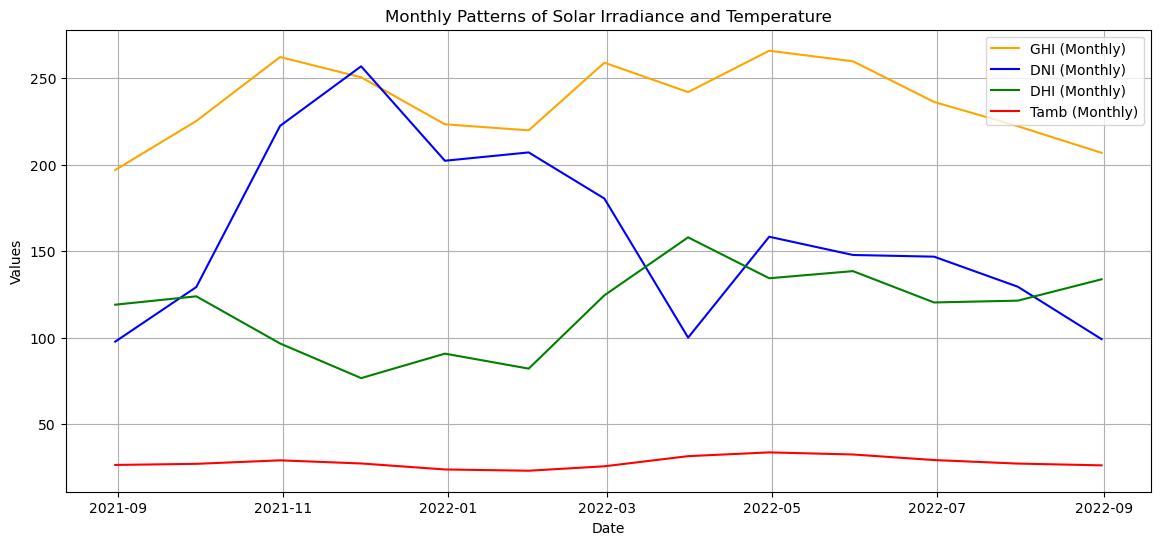

In [46]:
# Plotting Monthly Patterns
plt.figure(figsize=(14, 6))
plt.plot(df6_monthly.index, df6_monthly['GHI'], label='GHI (Monthly)', color='orange')
plt.plot(df6_monthly.index, df6_monthly['DNI'], label='DNI (Monthly)', color='blue')
plt.plot(df6_monthly.index, df6_monthly['DHI'], label='DHI (Monthly)', color='green')
plt.plot(df6_monthly.index, df6_monthly['Tamb'], label='Tamb (Monthly)', color='red')
plt.title('Monthly Patterns of Solar Irradiance and Temperature')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

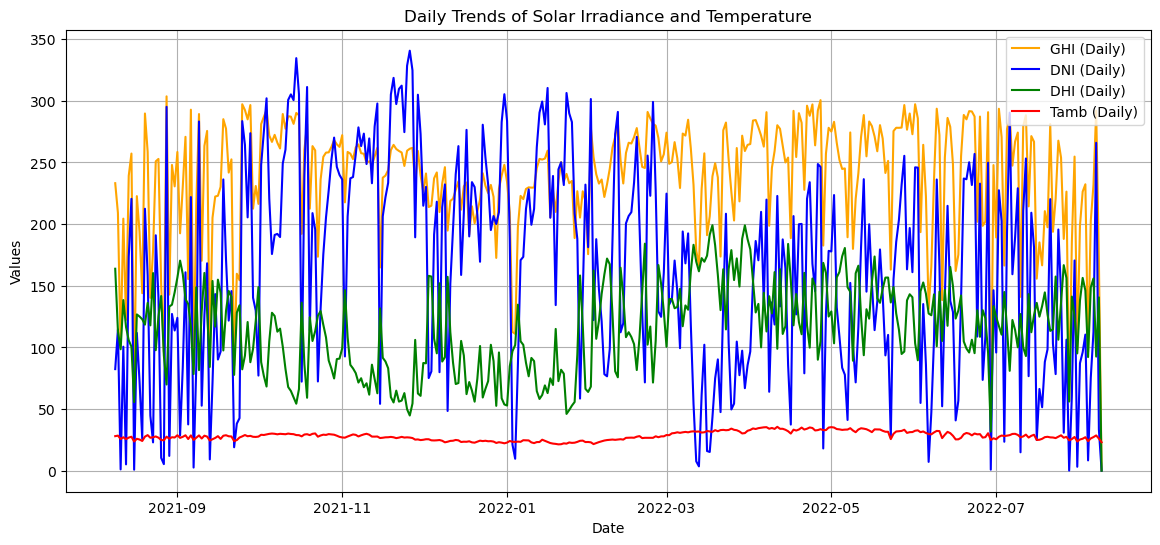

In [47]:
# Plotting Daily Trends
plt.figure(figsize=(14, 6))
plt.plot(df6_daily.index, df6_daily['GHI'], label='GHI (Daily)', color='orange')
plt.plot(df6_daily.index, df6_daily['DNI'], label='DNI (Daily)', color='blue')
plt.plot(df6_daily.index, df6_daily['DHI'], label='DHI (Daily)', color='green')
plt.plot(df6_daily.index, df6_daily['Tamb'], label='Tamb (Daily)', color='red')
plt.title('Daily Trends of Solar Irradiance and Temperature')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

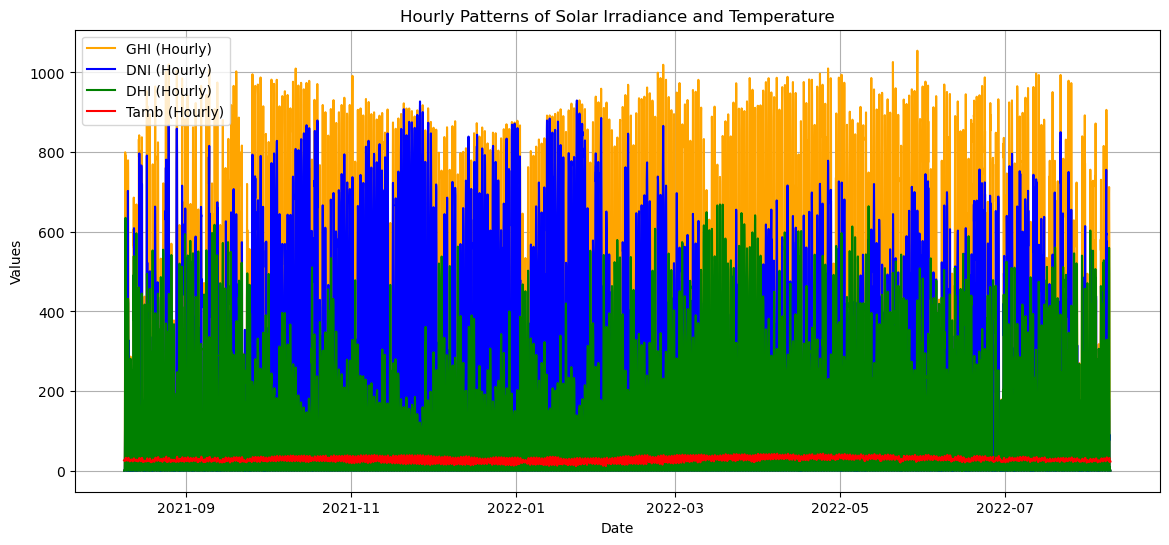

In [48]:
# Plotting Hourly Patterns
plt.figure(figsize=(14, 6))
plt.plot(df6_hourly.index, df6_hourly['GHI'], label='GHI (Hourly)', color='orange')
plt.plot(df6_hourly.index, df6_hourly['DNI'], label='DNI (Hourly)', color='blue')
plt.plot(df6_hourly.index, df6_hourly['DHI'], label='DHI (Hourly)', color='green')
plt.plot(df6_hourly.index, df6_hourly['Tamb'], label='Tamb (Hourly)', color='red')
plt.title('Hourly Patterns of Solar Irradiance and Temperature')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
#to summarize the given out put 
summary_stats = df6[['GHI', 'DNI', 'DHI', 'Tamb']].describe()
# Save the summary statistics to a CSV file
summary_stats.to_csv('summary_region1.csv')  # Change the filename for each region
